# Synthetic Light Curve Exploration

This notebook is my first attempt to set up a Light Curve Analysis Teaching Notebook. The goal is to introduce students to some of the basic features of light curves using Synthetic data files with a variety of features. Students are then guided through the anaysis of the light curve such that they gain a sense of what is happening with a simple light curve and how that changes are the light curve becomes more complex. By exploring light curves with increasing complexity, the students learn to interpret what they will see with real data sets that are highly "non-ideal"

Dates:
* initial Jul 08, 2025
* last updated July 09,2025


Initial light curve data files and code are from:

https://github.com/drjenncash/SyntheticLightCurves.git

In [1]:
## imports

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Step 0: Data File Inspection

The first step of light curve analysis is always a visual inspection of the data, but before that you may need an extra step to inspect the data file itself.

If it is a new data file format, you may want to look at the file itself before working with it in Python. 
Find out:
* Is it an ascii file or another format?
* Does the file have a header line above the data? How many lines for the header?
* What is the seperator or delimitor on the data?
* How many columns does the data have? What data type for each column?

The answers to these questions will influence how you read in the data file. 

Examples of a variety of data files are covered in our Tutorial 7 at https://github.com/drjenncash/SCSU-PAARE-python-intro-tutorials

For the synthetic data files I have provided, the files all have the same format. 

* The filename are of the form `syn_N.txt`
* They are plain ascii test files that can be examined in any text viewer.
* The have a header line showing the two columns are Time and FLux.
* The data in the columns are floats.
* The separator is a space character

If you grabbed the entire light curve repository then you should be able to address of the files using the relative path from this notebook. 

The cell below does a quick check for the file location. If it doesn't find the data file in the expected location, then you can use the reported working directory to help setup your path. 

In [58]:
testfilename = './syn_data/syn_1.txt'

if os.path.isfile(testfilename):
    print('It finds the file in the expected location')
else:
    print('The file was not found in the expected location.')
    print('Your notebooks working directory is: \n')
    print(os.getcwd())


It finds the file in the expected location


In [ ]:
#code for is readable?
#code to show first few lines to determine the delimiter and header lines

As another example, when I loaded the tutorials into Anaconda in the Cloud, I ended up using a file path name of the form 
`file = '~/clone/SyntheticLightCurves/syn_data/syn_1.txt'`

## Generating Synthetic Lightcurves

For this notebook, you can use the set of 25 synthetic light curves included in the repository as a starting point. 
I generated this set of example lightcurves to cover a range of light curve features (starting with very simple ideal curves and building in complexity).

Alternately, the code below defines functions that will create a dataframe with the same characteristics as these files which can be used in the notebook in place of and `data` variable. You will also be able to write this code out to a file similar in format to the other synthetic curves used here. 

> **Not finished**

In [ ]:
#

## External light curve files

If you want to use this notebook with lightcurves from another source, you will need to create the code needed to read the files into a pandas dataframe with 'Time' and 'Flux' columns

# Step 1: Visual Inspection

Once you have the data in a usable form, you will want to look at the light curve data. A simple time vs brightness plot will serve this purpose. As you play with the data, you may want to try line plots or scatter plots with different options.

Things to note about the data include but not limited to:
* How many data points?
* What is the time span of the data?
* What is the brightness range of the data?
* When plotted, can you see a pattern in the brightness variation?
    * Is there a trend?
    * Is it periodic?
    * Can you estimate a period?
* When plotted, can you see a pattern in the time of the observations?
    * Is it a regular observation timing?
    * Are there large gaps?
    *  



## Syn1.txt

In [3]:
# Set the filename and path
file = './syn_data/syn_1.txt'

# Read in the data file
data = pd.read_csv(file, sep = ' ')

#uncomment the line below to see the dataframe
#data

In [4]:
# Information about data1
print('Length of data set:',len(data))
print('Brightness range:',np.min(data['Flux']),np.max(data['Flux']))
print('Time range:',np.min(data['Time']),np.max(data['Time']))

Length of data set: 100
Brightness range: 11.000125872326125 12.999874127673875
Time range: 0.0 7.25


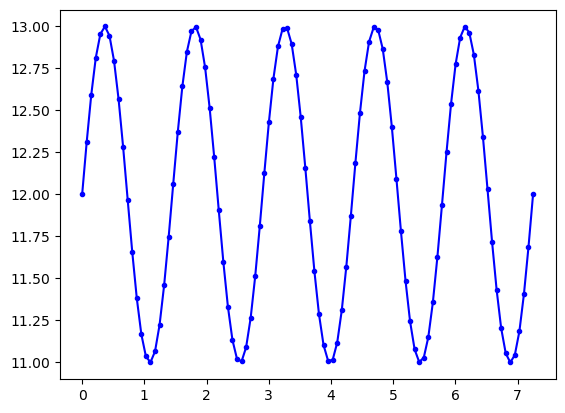

In [5]:
plt.plot(data['Time'],data['Flux'],'b.-')

**Notes**

For this light curve data file, there are 100 observations.

There is a clear pattern of oscillation that is well sampled. 

There are about 5 cycles with an amplitude of about 1 flux unit.

The period is between 1 and 2 time units, probably about 1.45. 

## Function for first initial look

To make life easier, I created a quick function to do the steps above for each light curve file. You just need to change the filename (making sure you have the correct path.

In [34]:
#Function for a simple light curve initial inspection
def lc_visual(file):

    data = pd.read_csv(file, sep = ' ')

    print('Length of data set:',len(data))
    print('Brightness range:',np.min(data['Flux']),np.max(data['Flux']))
    print('Time range:',np.min(data['Time']),np.max(data['Time']))

    plt.plot(data['Time'],data['Flux'],'b.-')
    plt.grid(True)

    return data

## Syn2.txt

Length of data set: 100
Brightness range: 11.000125872326125 12.999874127673875
Time range: 0.0 15.0


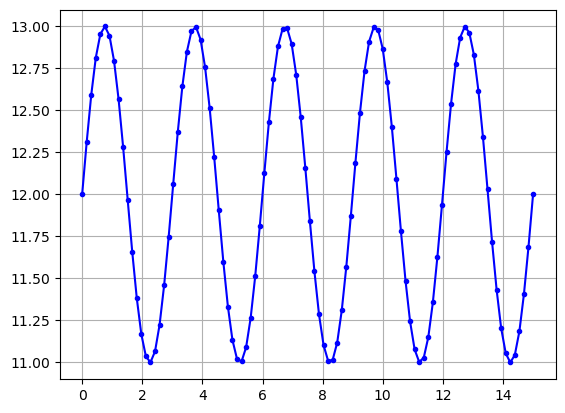

In [36]:
file = './syn_data/syn_2.txt'
data2 = lc_visual(file)

#If needed, you can uncomment the line below and change the xlim values to zoom in on a section of the lightcurve.
#plt.xlim(0,3)

**Syn_2 Notes**

For this light curve data file, there are 100 observations, but the time span is now about 15.

There is a clear pattern of oscillation that is well sampled. 

There are about 5 cycles with an amplitude of about 1 flux unit.

The period is about 3 time units. 

----

In [ ]:
file = './syn_data/syn_3.txt'
lc_visual(file)

In [ ]:
file = './syn_data/syn_5.txt'
lc_visual(file)

In [ ]:
file = './syn_data/syn_9.txt'
lc_visual(file)

In [ ]:
file = './syn_data/syn_14.txt'
lc_visual(file)

Length of data set: 500
Brightness range: 9.264441822159544 14.725868761691563
Time range: 1438.0786548080607 1501.7613285167758


(1450.0, 1460.0)

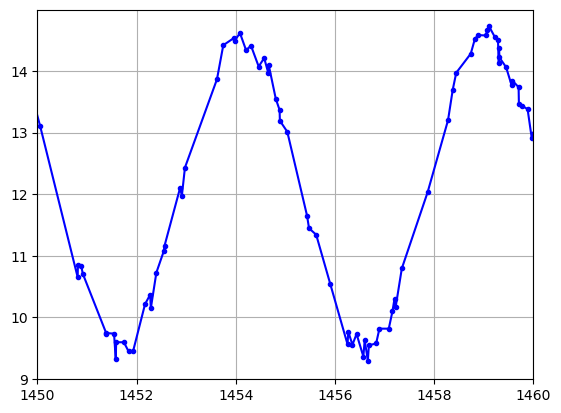

In [48]:
file = './syn_data/syn_25.txt'
data = lc_visual(file)
plt.xlim(1450,1460)

# Step 2: Period Determination Methods

## Phase Folding Conceptual Explanation


In [18]:
#Estimate the period
per = 1.45

# Use the estimated period to calculate the phase and cycle #
value = data['Time']/per
cycle = np.floor(value).astype(int)
phase = value - cycle

In [ ]:
#Showing the cycle breaks

# Plot the lightcurve data as normal
plt.plot(data['Time'],data['Flux'],'b.-')
plt.xlabel('Time')
plt.ylabel('Flux')

# Plot vertical lines separating the cycles
for i in range((np.max(cycle))+2):
    plt.axvline(i*per)

In [ ]:
plt.plot(cycle)
plt.xlabel('index')
plt.ylabel('cycle #')

In [ ]:
plt.plot(phase)
plt.xlabel('index')
plt.ylabel('phase')

In [ ]:
#Showing the cycle breaks and different colors for each cycle

# Plot the lightcurve data as normal
plt.plot(data['Time'],data['Flux'])
plt.xlabel('Time')
plt.ylabel('Flux')

# Plot vertical lines separating the cycles
for i in range((np.max(cycle))+2):
    plt.axvline(i*per)

plt.scatter(data['Time'],data['Flux'],c=cycle, cmap='tab10')

In [ ]:
#Showing the phase folded light-curve colors for each cycle

# Plot the lightcurve data as normal
plt.scatter(phase,data['Flux'],c=cycle, cmap='tab10')
plt.xlabel('Phase')
plt.ylabel('Flux')

plt.colorbar( label='Cycle Number')



## Phase Folding with a function

Now that you have an understanding of what the phase folding is doing, we can simplify the process by creating another function to take the dataframe and do the phase folding. 

The `data` is expected to be a pandas dataframe with a `Time` and `Flux` column. 

Since we don't know ahead of time how many cycles will be included in the lightcurve, the function also looks at the number of cycles and selects a color map. 

In [45]:
# Function to do the phase folding calculation and plotting
def phase_fold_plot(data,per):

    #Calculate the phase information
    value = data['Time']/per
    cycle = np.floor(value).astype(int)
    phase = value - cycle

    #Select an appropriate color map depending on the number of cycles
    ncycles = cycle.iloc[-1]-cycle.iloc[0]
    if ncycles < 10:
        usemap = 'tab10'
    elif ncycles < 20:
        usemap = 'tab20c'
    else:
        usemap = 'rainbow'
        
    
    # Create the Phase folded Scatter plot for 2 cycles
    plt.scatter(phase,data['Flux'],c=cycle, cmap=usemap)
    plt.scatter(phase+1,data['Flux'],c=cycle, cmap=usemap)
    plt.xlabel('Phase')
    plt.ylabel('Flux')

    plt.colorbar( label='Cycle Number')

    return


Length of data set: 500
Brightness range: 7.026054201085541 16.959905987977038
Time range: 0.1369813984883017 226.5463604452172


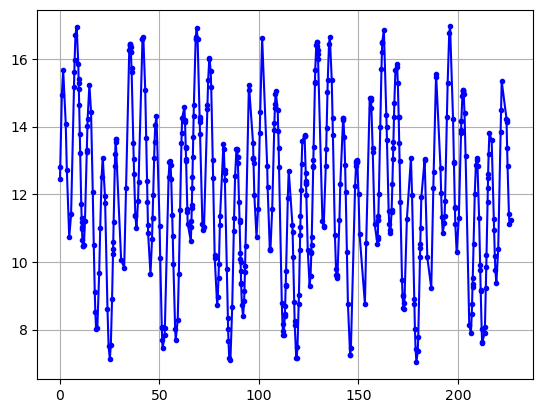

In [87]:
# Read in the lightcurve and get the basic parameters
file = './syn_data/syn_24.txt'
data = lc_visual(file)
#plt.xlim(0,30)

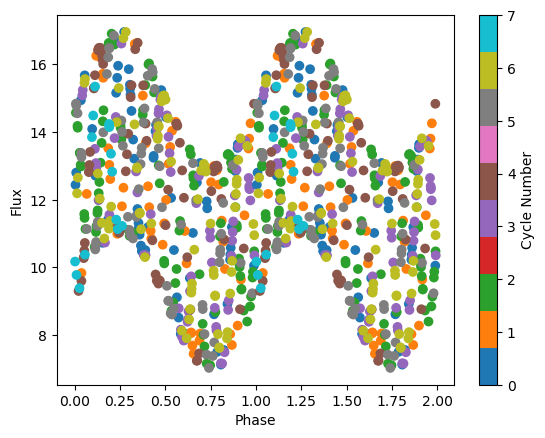

In [89]:
# Do the phase folding and plot the curve
phase_fold_plot(data,31.2)

# Step 3: Curve Fitting